In [2]:
import pandas as pd
import sqlite3

In [3]:
db_con = sqlite3.connect('../checking-logs.sqlite.sqlite')

In [16]:
com = pd.io.sql.read_sql("select timestamp from checker WHERE uid LIKE 'user_%'", db_con)
commits = pd.DataFrame(pd.to_datetime(com['timestamp']).dt.date)
commits['hour'] = pd.to_datetime(com['timestamp']).dt.hour

labels = ['night', 'morning', 'afternoon', 'evening']
bins = [0, 4, 10, 17, 24]
commits['daytime'] = pd.cut(commits['hour'], labels=labels, bins=bins, include_lowest=True, right=False)
commits.rename(columns={'timestamp':'date'}, inplace=True)

commits = commits.groupby(['date', 'daytime']).count().reset_index()
commits

,date,daytime,hour
0,2020-04-17,night,0
1,2020-04-17,morning,13
2,2020-04-17,afternoon,10
3,2020-04-17,evening,0
4,2020-04-18,night,0
...,...,...,...
135,2020-05-20,evening,10
136,2020-05-21,night,0
137,2020-05-21,morning,1
138,2020-05-21,afternoon,27


In [28]:
data = pd.pivot(commits, values='hour', index='date', columns='daytime')
data

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


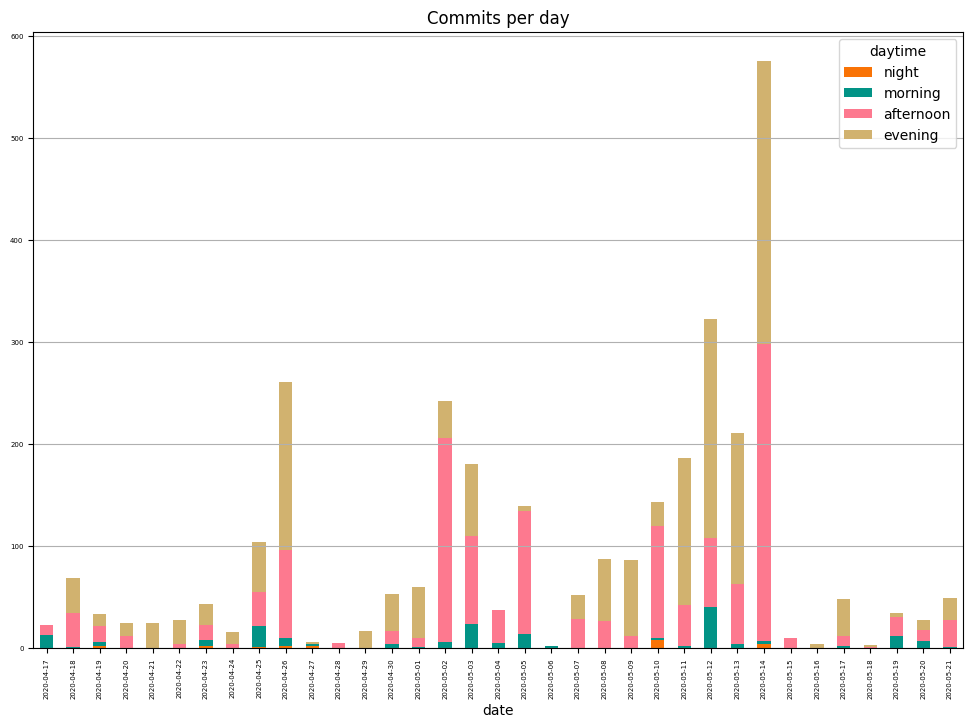

In [32]:
data.plot(kind = 'bar', stacked = True, fontsize=5, figsize=(12,8), title='Commits per day',
    color=['xkcd:orange', 'xkcd:teal', 'xkcd:carnation', 'xkcd:tan']).grid(axis='y')